# **SWE 485: Selected topics in software engineering Course Project**
# **Heart Failure Prediction**

Shaden alayed - 441201078
Lamis Abdulaziz Alqahtani - 441201349
Latifa Alkhamis - 441201088
Alkhansaa Alsultan - 441925093
Leen Aljamaan - 441200774 

# **Introduction**

The Heart Failure Prediction dataset comprehensive collection of data aimed at understanding and predicting system failures in various industrial and technological settings. It is a global health concern that affects millions of people each year. Despite advancements in medical technology and treatments, the rate of mortality due to heart failure remains high. One of the key challenges in reducing mortality rates is the timely identification and management of individuals who are at high risk of experiencing heart failure.

In traditional healthcare settings, the prediction of heart failure is largely based on manual examinations and relies heavily on the expertise of medical professionals. While effective to some extent, this approach has its limitations, such as potential for human error, and can be resource-intensive. The advent of machine learning technologies offers a promising solution to this problem.

Using a Heart Failure Prediction Dataset, machine learning algorithms can be trained to predict the likelihood of heart failure based on a multitude of factors, such as age, gender, lifestyle habits, and various medical indicators like blood pressure, cholesterol levels, and more.

# **Motivation**

The motivation behind heart failure prediction is to improve patient outcomes, optimize healthcare resource allocation, and enable early intervention. By accurately predicting the risk of heart failure, healthcare providers can identify high-risk individuals and implement timely preventive measures. This can lead to better management of the condition, reduced hospitalizations, improved quality of life, and ultimately, the potential to save lives.

# **Goal**

The goal of a Heart Failure Prediction Dataset is generally to predict the likelihood of a heart failure event based on a variety of medical and lifestyle factors.

By training a machine learning model on this dataset, healthcare professionals aim to: Identify high-risk patients early on for proactive treatment. Understand which factors are most predictive of heart failure. Enable better resource allocation in healthcare settings. Provide a tool for doctors and medical staff to augment their diagnosis and treatment plans. This can also be useful for educating patients about the risks associated with their current health status, encouraging them to adopt a healthier lifestyle.

Machine learning techniques like Logistic Regression, Random Forests, and Neural Networks are commonly used for this type of predictive modeling.

# **Data**

The largest heart disease dataset available for research purposes, Observations in the final dataset: 918 Age : age of the patient [years] Sex : sex of the patient [M: Male, F: Female] ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] RestingBP : resting blood pressure [mm Hg] Cholesterol : serum cholesterol [mm/dl] FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] MaxHR : maximum heart rate achieved [Numeric value between 60 and 202] ExerciseAngina : exercise-induced angina [Y: Yes, N: No] Oldpeak : oldpeak = ST [Numeric value measured in depression] ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] HeartDisease : output class [1: heart disease, 0: Normal]

Our dataset is in the following URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

The imports used in our project

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

**Data exploration**

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


To Spot any missing values (null values) used, isnull() function which indicts that there are no null values

In [9]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


# **Data Encoding**

In [10]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [11]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [12]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [13]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [15]:
dfNew= df.copy()

In [16]:
dfNew.Sex.replace(
    {
       'F' : 0,
       'M' : 1
    }, 
    inplace = True
)
dfNew.ExerciseAngina.replace(
    {
       'N' : 0,
       'Y' : 1
    }, 
    inplace = True
)
dfNew.ST_Slope.replace(
    {
        'Down' : 1,
        'Flat' : 2,
          'Up' : 3
    },
    inplace= True
    )

dfNew.RestingECG.replace(
    {
        'Normal' : 1,
            'ST' : 2,
           'LVH' : 3
    },
    inplace= True
)

dfNew.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,1,172,0,0.0,3,0
1,49,0,NAP,160,180,0,1,156,0,1.0,2,1
2,37,1,ATA,130,283,0,2,98,0,0.0,3,0
3,48,0,ASY,138,214,0,1,108,1,1.5,2,1
4,54,1,NAP,150,195,0,1,122,0,0.0,3,0


In [17]:
dfNew= pd.get_dummies(dfNew, drop_first=True)
dfNew = dfNew.astype(int)
dfNew.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0,3,0,1,0,0
1,49,0,160,180,0,1,156,0,1,2,1,0,1,0
2,37,1,130,283,0,2,98,0,0,3,0,1,0,0
3,48,0,138,214,0,1,108,1,1,2,1,0,0,0
4,54,1,150,195,0,1,122,0,0,3,0,0,1,0


In [18]:
continuous_cols = []
categorical_cols = []

categorical_threshold = 3

for col in dfNew.columns:
    unique_values = dfNew[col].nunique()
    
    if unique_values <= categorical_threshold:
        categorical_cols.append(col)
    else:
        continuous_cols.append(col)

In [19]:
continuous_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [20]:
categorical_cols

['Sex',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA']

All the columns are converted into Numberical features

In [21]:
dfNew.isna().sum()

Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ST_Slope             0
HeartDisease         0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
dtype: int64

In [22]:
dfNew.value_counts('HeartDisease')

HeartDisease
1    508
0    410
Name: count, dtype: int64

# **Data Analysis With Vizualization**

**Distribution plot** 

Distribution plots provide a visual assessment of the distribution of sample data and depict the overall distribution that shows the impact of values

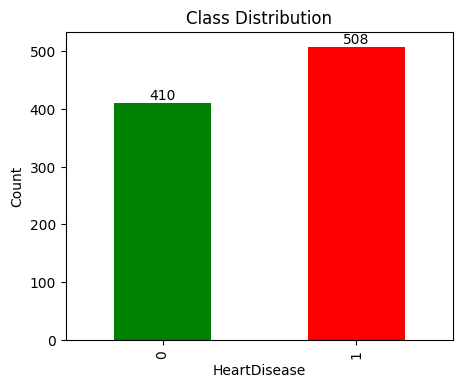

In [23]:
class_counts = dfNew['HeartDisease'].value_counts().sort_index()
colors = ['green', 'red']
ax = class_counts.plot(kind='bar', color=colors, figsize=(5, 4))
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Class Distribution')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.xticks(range(len(class_counts)), class_counts.index)
plt.show()

**scatter plot**  

A scatterplot is a type of data display that shows the relationship between two numerical variables.

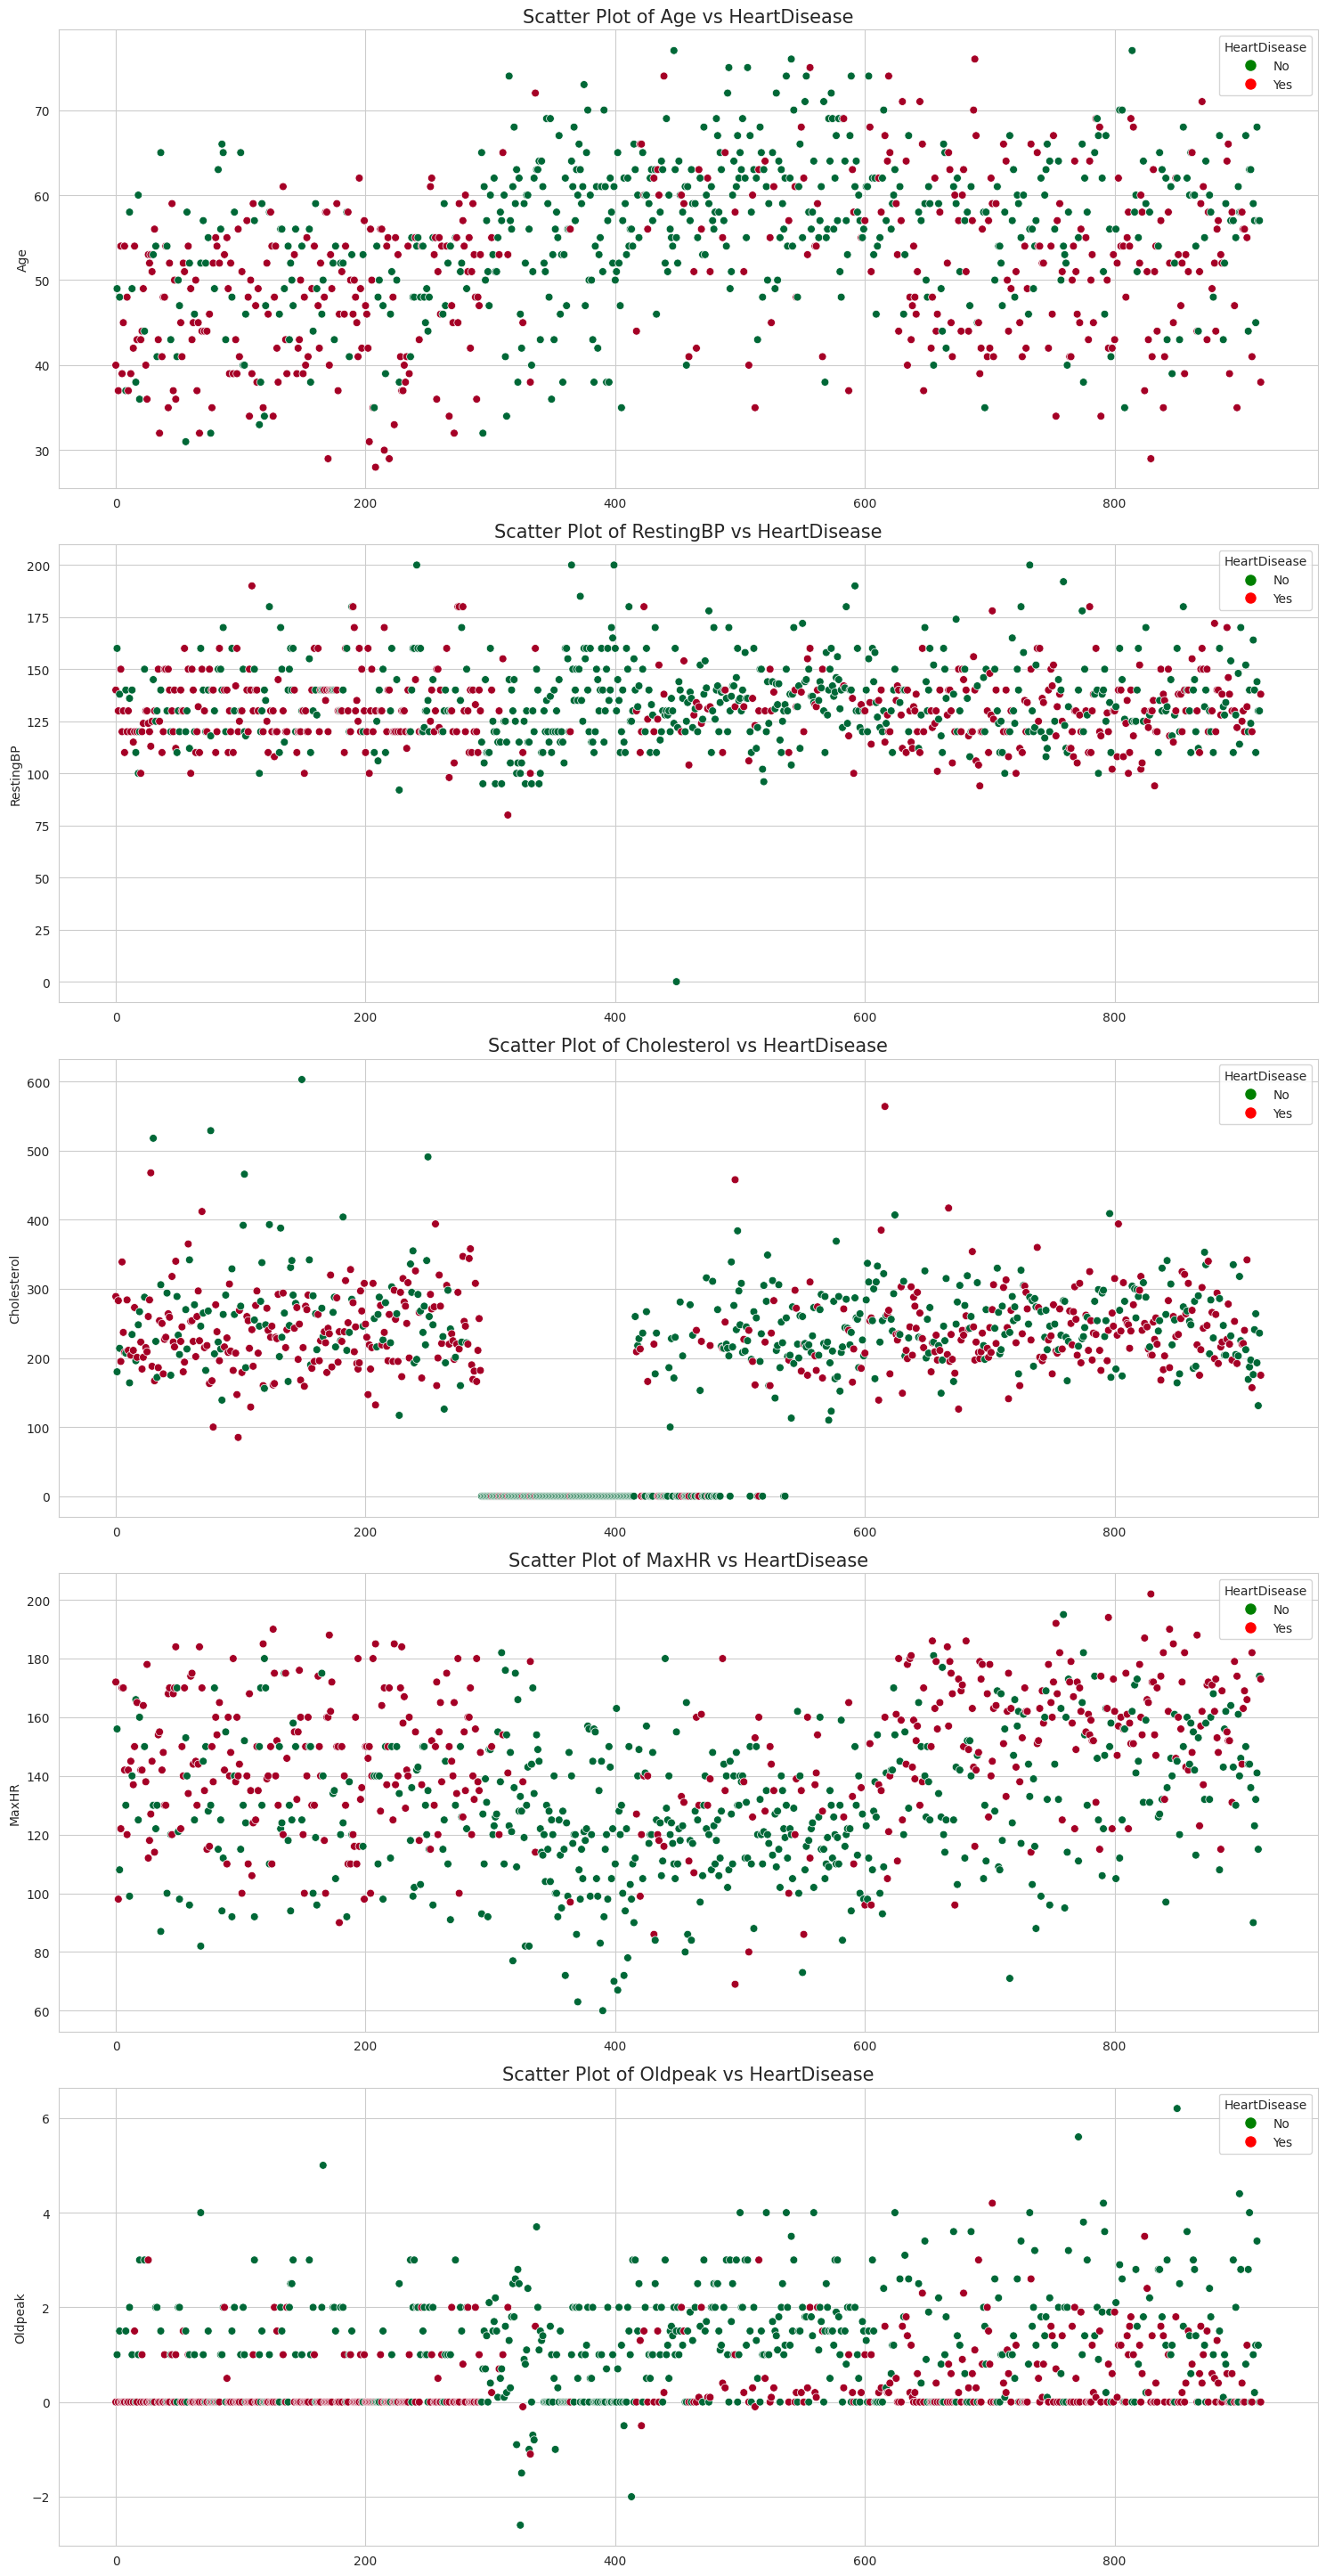

In [24]:
sns.set_style('whitegrid')

custom_palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(15, 75))

#num = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

for i, num_var in enumerate(continuous_cols, start=1):
    plt.subplot(13, 1, i)  # Adjust the subplot position based on 'i'
    
    scatter = sns.scatterplot(x=df.index, y=df[num_var], c=df['HeartDisease'], cmap='RdYlGn', s=40, palette=custom_palette)
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='No'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Yes')
    ]
    
    plt.legend(handles=legend_elements, title='HeartDisease')
    #plt.xlabel(num_var, fontsize=15)
   # plt.ylabel('Heart Disease', fontsize=15)
    plt.title(f'Scatter Plot of {num_var} vs HeartDisease', fontsize=15)

plt.tight_layout()
plt.show()

In [25]:
dfNew.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'],
      dtype='object')

In [26]:
print('Before Removing Outliers', dfNew.shape)
dfNew = dfNew[dfNew['RestingBP']>85]
print('After Removing Outliers', dfNew.shape)

Before Removing Outliers (918, 14)
After Removing Outliers (916, 14)


In [27]:
print('Before Removing Outliers', dfNew.shape)
dfNew = dfNew[dfNew['Cholesterol']<=500]
print('After Removing Outliers', dfNew.shape)

Before Removing Outliers (916, 14)
After Removing Outliers (912, 14)


In [28]:
print('Before Removing Outliers', dfNew.shape)
dfNew = dfNew[dfNew['Oldpeak']>=0]
print('After Removing Outliers', dfNew.shape)

Before Removing Outliers (912, 14)
After Removing Outliers (906, 14)


In [29]:
categorical_cols.remove('HeartDisease')

 **Bar Chart**  
 
 Bar chart employs a specific chart type to visually depict categorization and effectively illustrate the relative magnitude of each respective category.

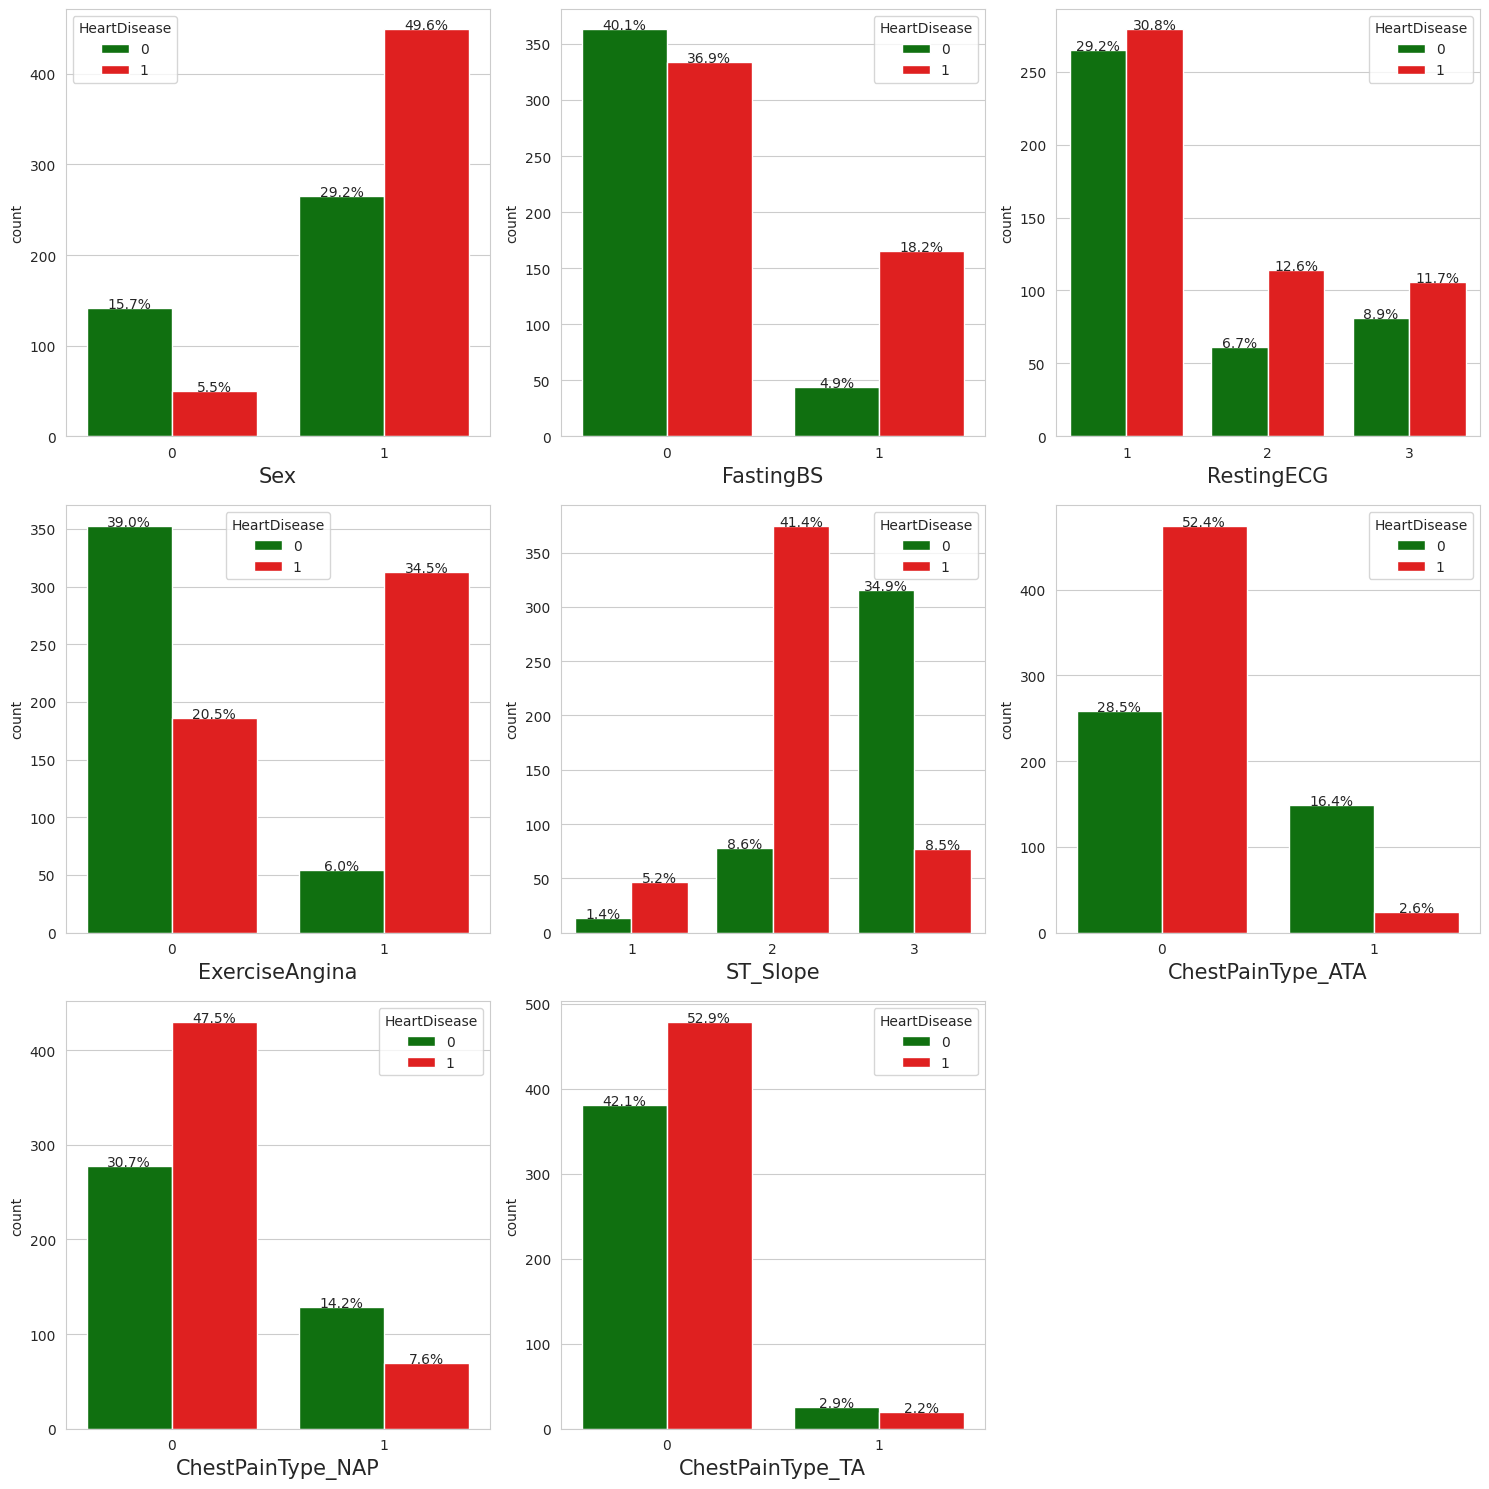

In [30]:
plt.figure(figsize=(15, 15))
custom_palette = {0: 'green', 1: 'red'}

for i, cat_var in enumerate(categorical_cols, start=1):
    plt.subplot(3, 3, i)  # Adjust the subplot position based on 'i'
    sns.countplot(x=cat_var, hue='HeartDisease', data=dfNew, palette=custom_palette)
        # Calculate and display percentages on the bars
    ax = plt.gca()
    total = len(dfNew)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xlabel(cat_var, fontsize=15)

plt.tight_layout()
plt.show()

**Distribution of Data**  

distribution plots provide a visual assessment of the distribution of sample data and depict the overall distribution that shows the impact of values

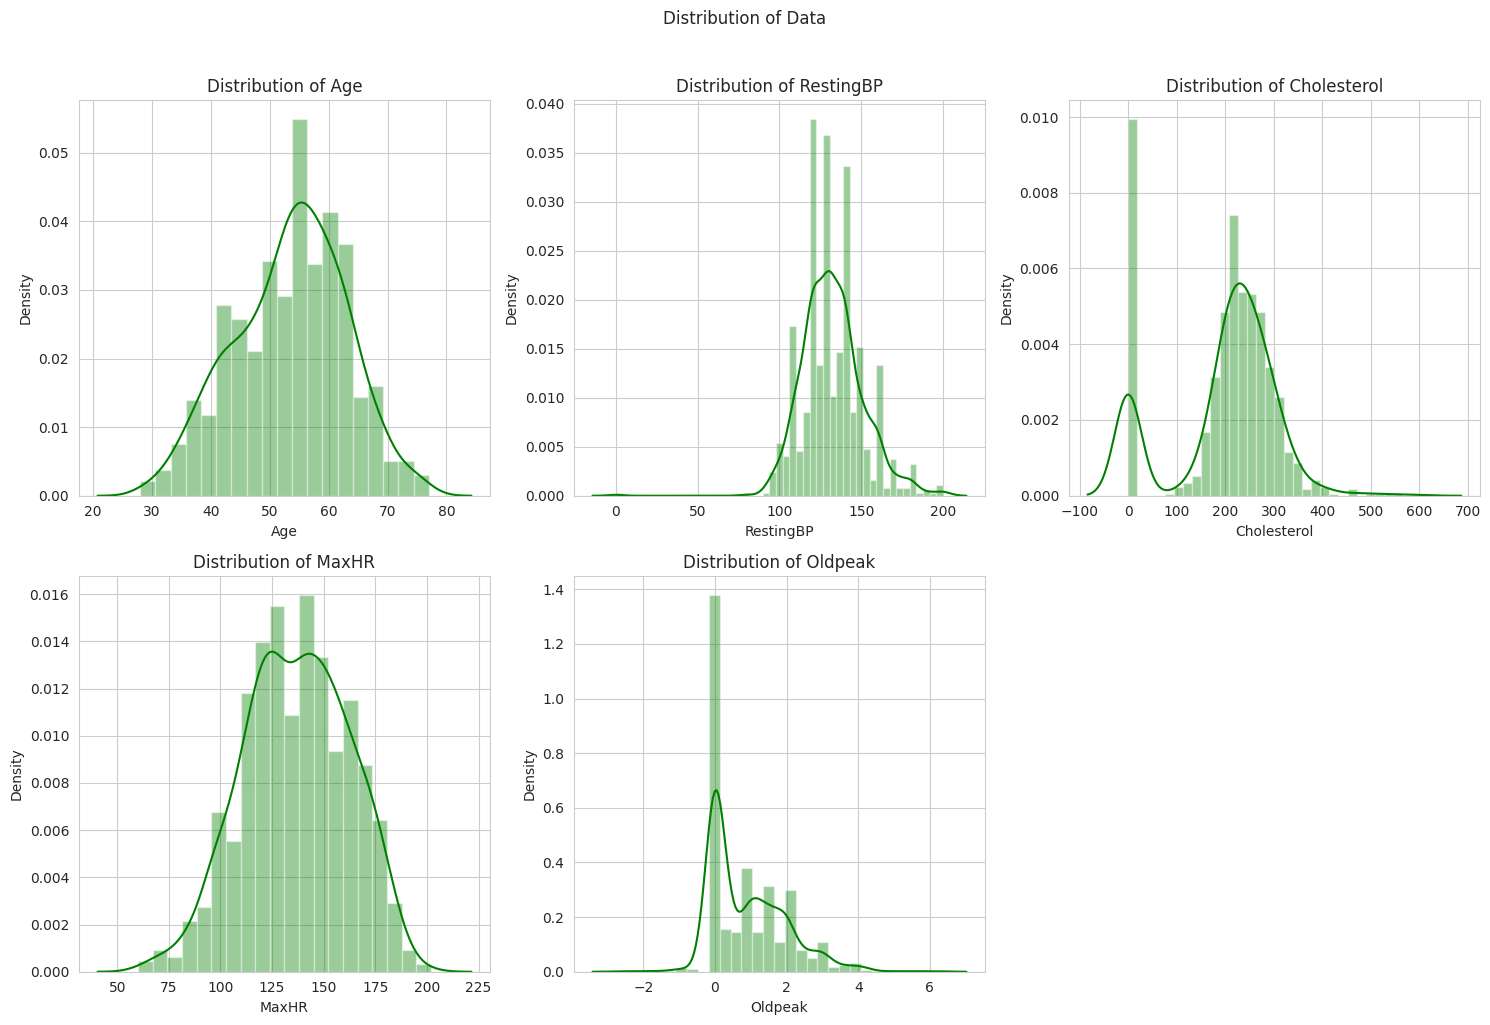

In [31]:
features = continuous_cols

# Define the number of rows and columns for subplots
num_rows = len(features) // 3 + (len(features) % 3 > 0)
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Create distribution plots for each feature
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    
    sns.distplot(df[feature], color='green', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    
# Remove any empty subplots
if len(features) < num_rows * num_cols:
    for i in range(len(features), num_rows * num_cols):
        fig.delaxes(axes[i // num_cols][i % num_cols])

fig.suptitle("Distribution of Data", y=1.02)
plt.tight_layout()
plt.show()

**Missing values(null):**
To Spot any missing values (null values) used, isnull() function which indicts that there are no null values:

In [32]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


**Statistical summaries:**

.describe() method used to calculate Mean and variance and other statistical calculations.

In [33]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **Preprocessing**

In [34]:
# Check missing Value

missing = df.isna().sum()
missing = missing[missing>0]
if missing is np.nan:
    print(missing[missing>0])
else:
    print('-'* 30,'\nThere are no missing values')

------------------------------ 
There are no missing values


In [35]:
# Check duplicate Value

if df[df.duplicated()].empty:
    print('-'* 30,'\nThere are no duplicate values')
else:
    print(df[df.duplicated()])

------------------------------ 
There are no duplicate values


**Correlation graph**  

In a correlation graph, each data point represents a pair of observations for the two variables being compared.

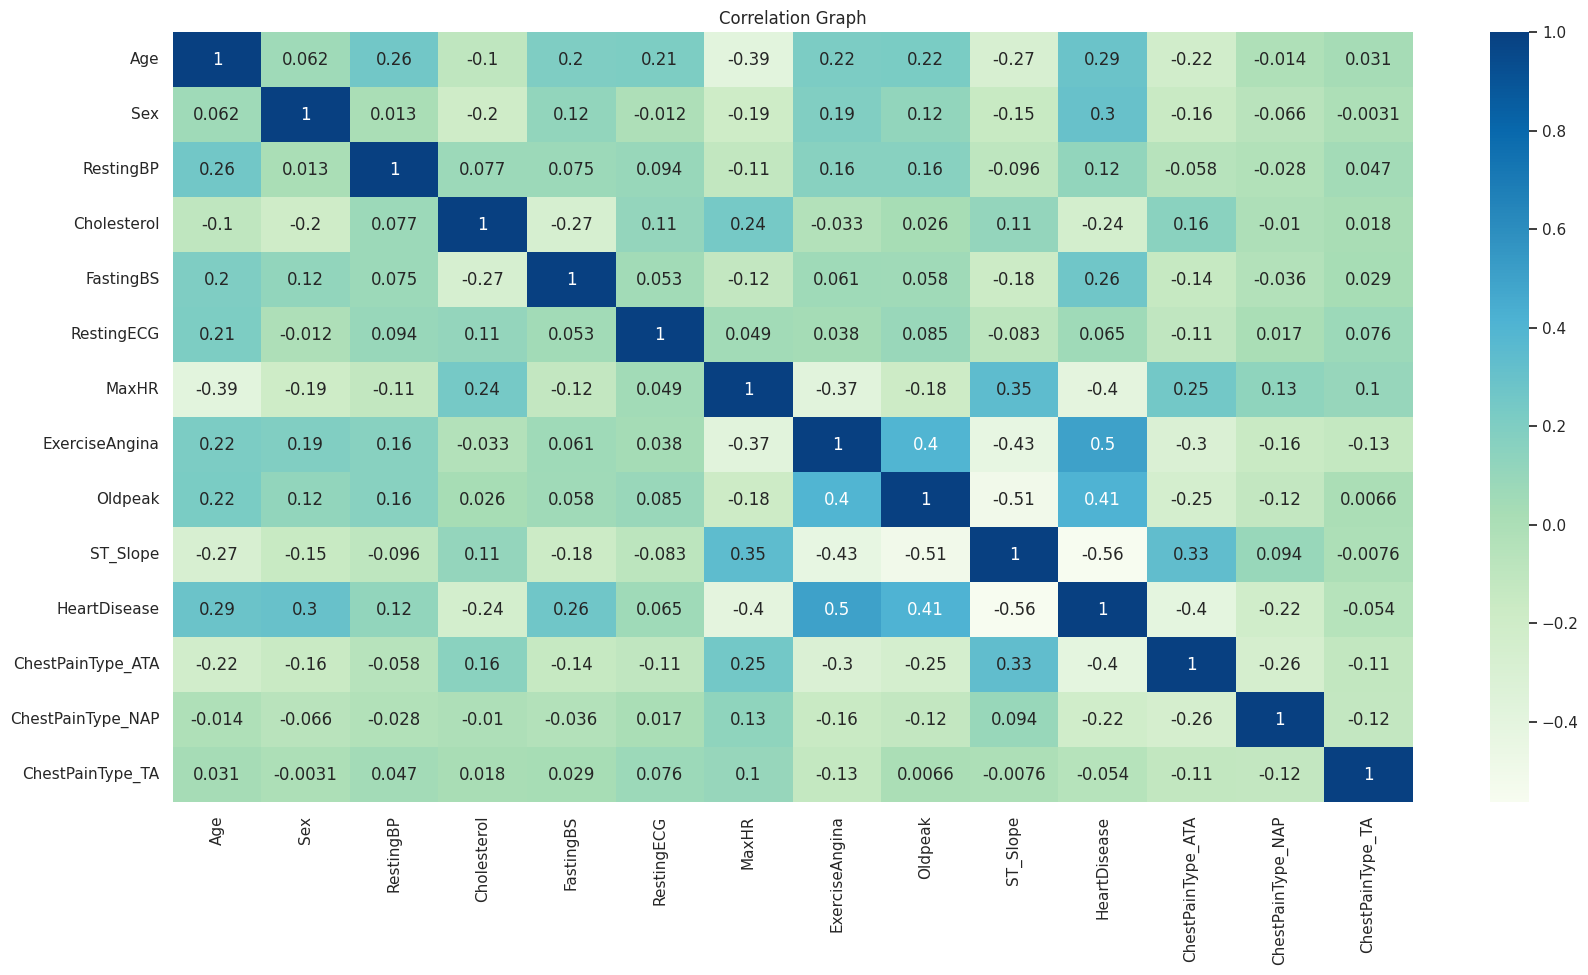

In [36]:
sns.set()
plt.figure(figsize=(20, 10))
sns.heatmap(dfNew.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

In [37]:
# Most correlated features

corrmat = dfNew.corr()
top_corr_features = corrmat.index[abs(corrmat["HeartDisease"])>0.5]
if len(top_corr_features) == 1:
    plt.figure(figsize=(10,10))
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    g = sns.heatmap(dfNew.corr(),annot=True,cmap="RdYlGn")
else:
    print('-'* 55,'\nThere are no correlation between features more than 50%')

------------------------------------------------------- 
There are no correlation between features more than 50%


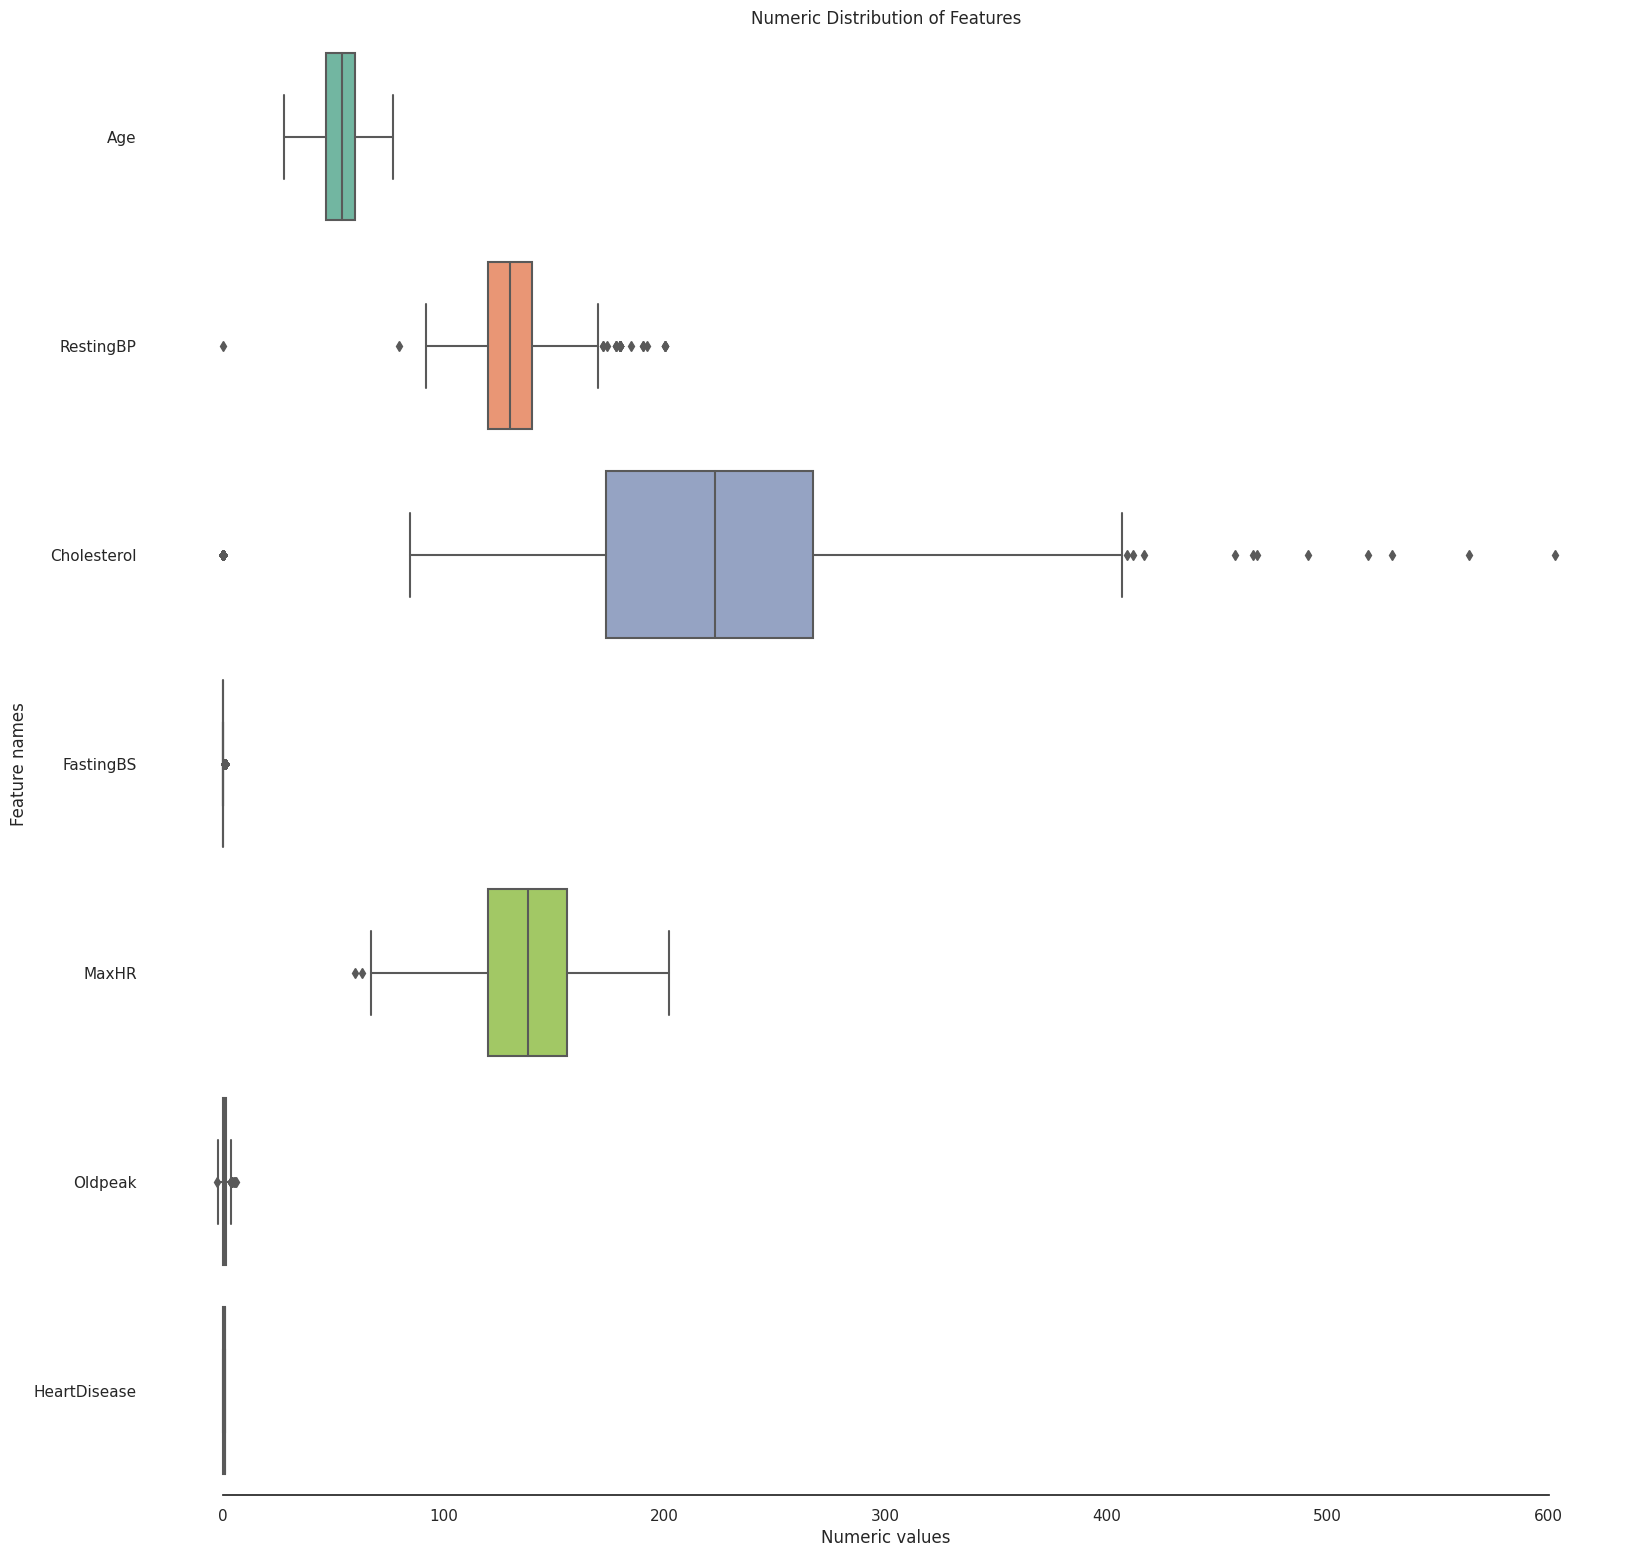

In [38]:
# Check outliers

# Box plots for all our numeric features
df_exclude_obj=df.select_dtypes(exclude=['object'])

sns.set_style("white")
f, ax = plt.subplots(figsize=(19, 19))
# ax.set_xscale("log")
ax = sns.boxplot(data=df_exclude_obj, orient="h", palette="Set2")
# Tweak the visual presentation
# ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)


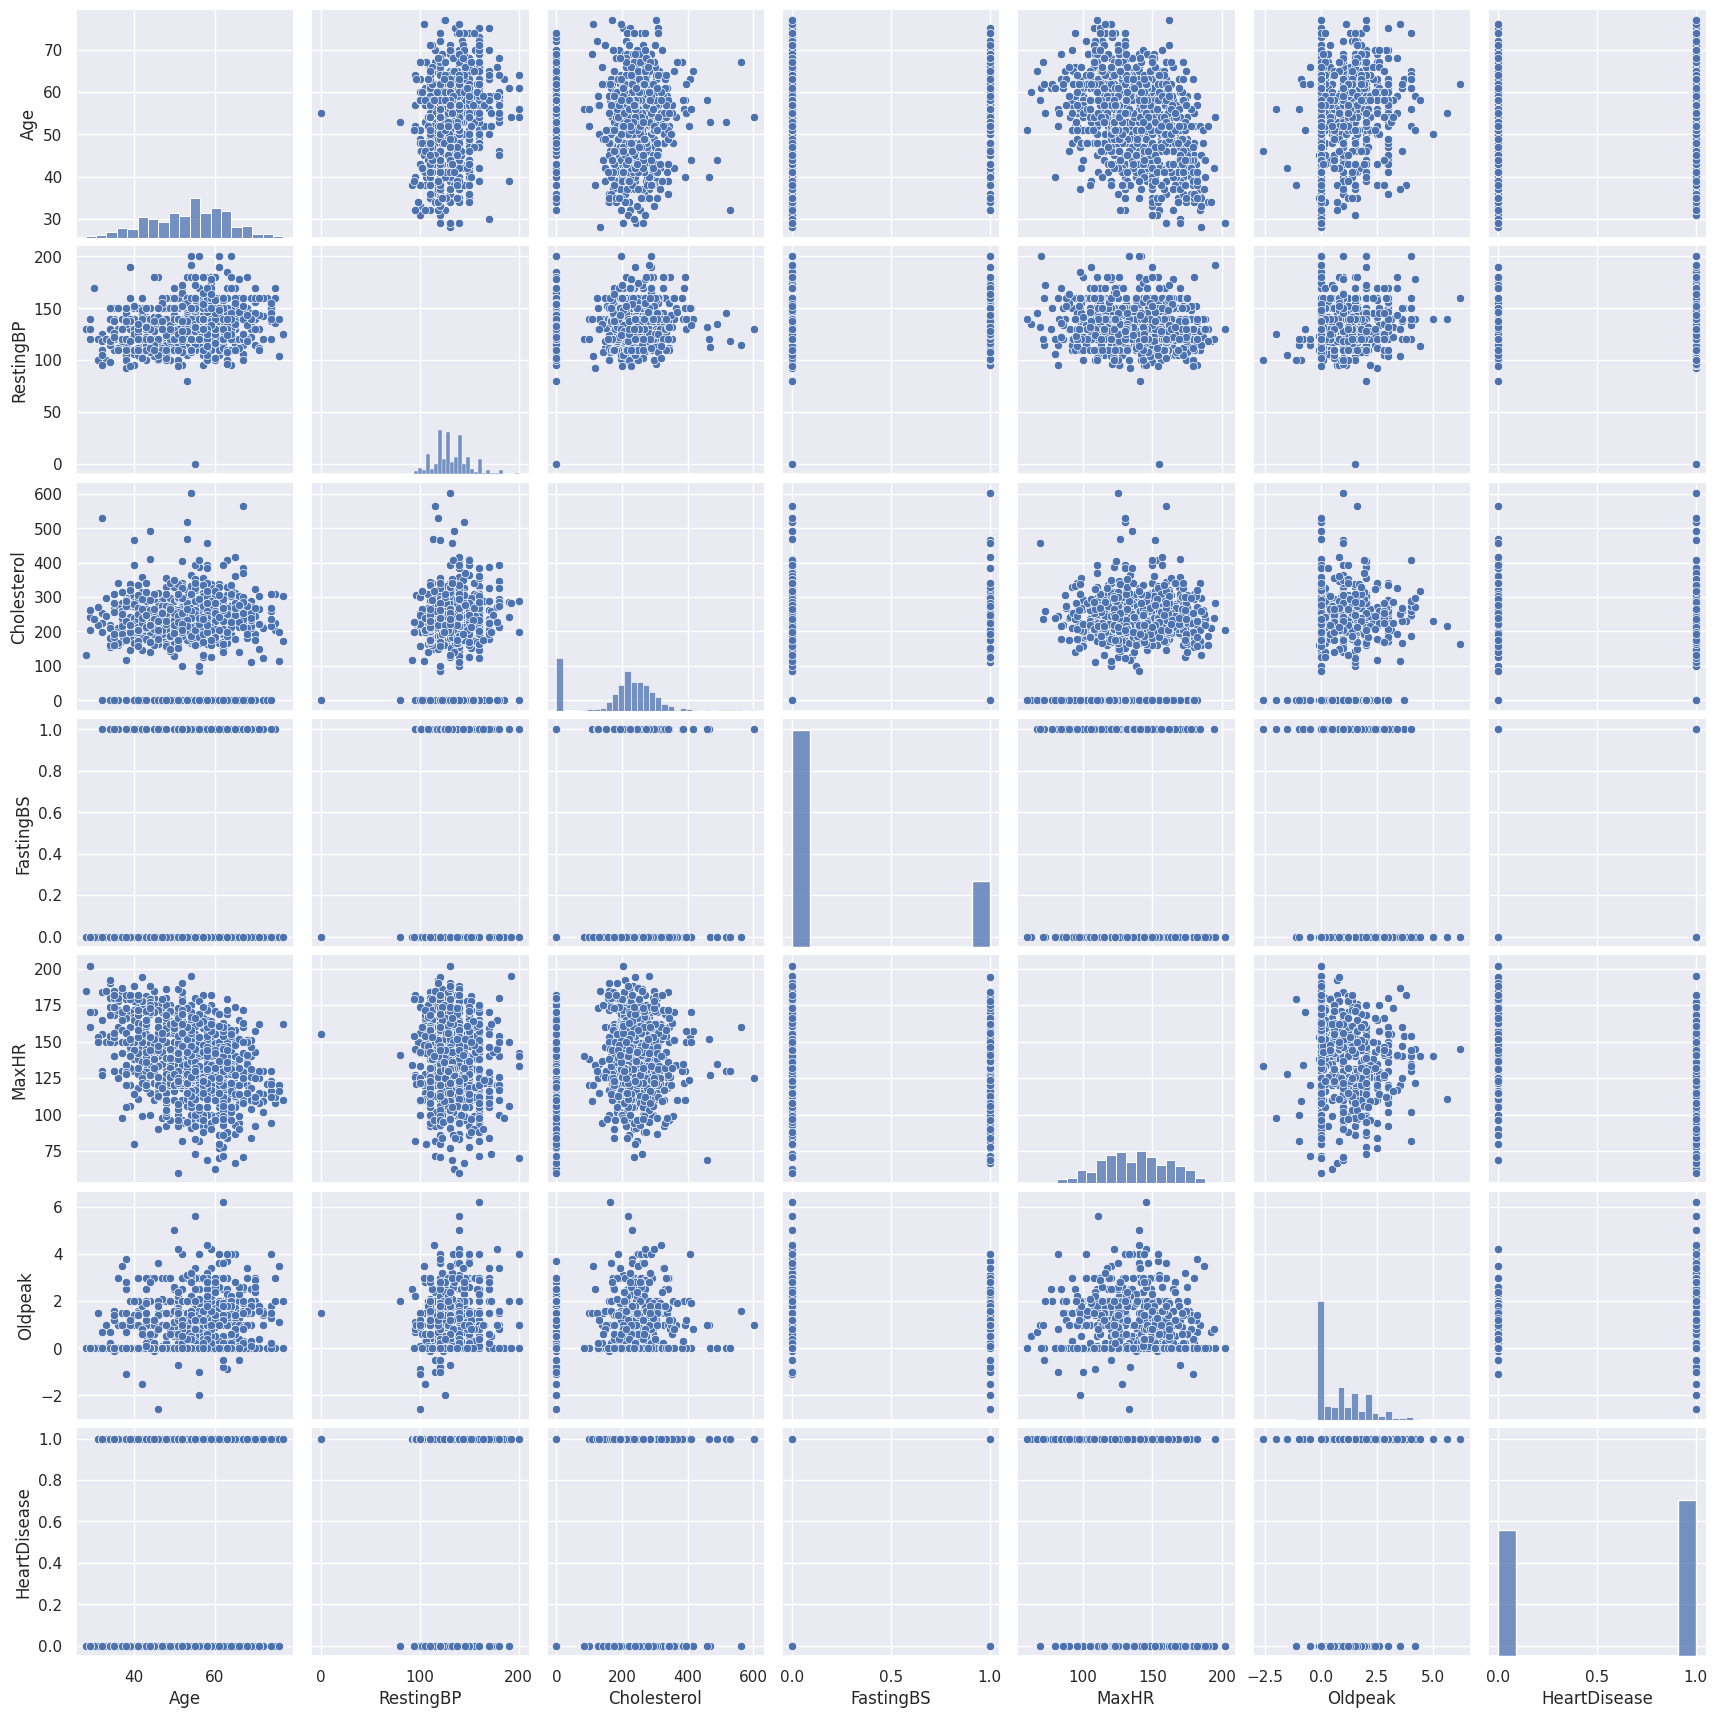

In [39]:
# Pairplot

sns.set()
sns.pairplot(df_exclude_obj, size = 2.5)
plt.show();

In [40]:
# Remove outlier

categorical_df = df.select_dtypes(include='object')
numerical_df = df.select_dtypes(exclude='object')

# IQR
# Calculate the upper and lower limits

Q1 = numerical_df.quantile(0.1)
Q3 = numerical_df.quantile(0.9)
IQR = Q3 - Q1
idx = ~((numerical_df < round(Q1 - 1.5 * IQR)) | round(numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_df = pd.concat([numerical_df.loc[idx], categorical_df.loc[idx]], axis=1)
  

In [41]:
print("Number of rows before remove outliers:", len(df), "\n")

print("Number of rows after remove outliers:", len(cleaned_df), "\n")

Number of rows before remove outliers: 918 

Number of rows after remove outliers: 916 



In [42]:
# Seperate target col

target_name = "HeartDisease"
target = cleaned_df[target_name]

data = cleaned_df.drop(columns=[target_name])

There is no missing and duplicate in our dataset, because it’s already clean

# Phase2: supervised learning


In [43]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [44]:
Encoder = LabelEncoder()
#scalar = StandardScaler()
scalar = MinMaxScaler()

In [45]:
df['Sex'] = Encoder.fit_transform(df['Sex'])
df['ChestPainType'] = Encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = Encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = Encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = Encoder.fit_transform(df['ST_Slope'])

In [46]:
df[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']] = scalar.fit_transform(df[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']])

In [47]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**models**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2)

**Logistic regression** is a statistical model used for binary classification problems, where the goal is to predict the probability of an event occurring based on input features.

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 3)
log = round(logreg.score(X_test, y_test) * 100, 3)
print("Train: ", acc_log)
print("Test: ", log)

Train:  85.559
Test:  85.87


**SVC**

SVC stands for Support Vector Classifier, which is a machine learning algorithm used for classification tasks. It is a type of supervised learning algorithm that falls under the category of Support Vector Machines (SVM).

In [51]:
SVC = SVC(kernel= 'linear', C= 1)
SVC.fit(X_train, y_train)
acc_svc = round(SVC.score(X_train, y_train) * 100, 3)
svc = round(SVC.score(X_test, y_test) * 100, 3)
print("Train: ", acc_svc)
print("Test: ", svc)

Train:  86.649
Test:  86.413


**Random Forest Classifier** is a popular machine learning algorithm that is used for classification tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.

In [52]:
RandomForestClassifier = RandomForestClassifier(n_estimators=10)
RandomForestClassifier.fit(X_train, y_train)
acc_random_forest = round(RandomForestClassifier.score(X_train, y_train) * 100, 3) 
random_forest = round(RandomForestClassifier.score(X_test, y_test) * 100, 3) 
print("Train: ", acc_random_forest)
print("Test: ", random_forest)

Train:  99.319
Test:  83.696


**Decision Tree Classifier** is a popular machine learning algorithm used for both classification and regression tasks. It is a supervised learning algorithm that builds a tree-like model of decisions based on the features of the input data.

In [53]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)
acc_decision_tree = round(DecisionTreeClassifier.score(X_train, y_train) * 100, 3)
decision_tree = round(DecisionTreeClassifier.score(X_test, y_test) * 100, 3)
print("Train: ",acc_decision_tree)
print("Test: ", decision_tree)

Train:  100.0
Test:  80.435


**K-Nearest Neighbors (KNN) Classifier** is a popular machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm that makes predictions based on the similarity between a query instance and its neighboring instances in the training data.

In [54]:
KNeighborsClassifier = KNeighborsClassifier(n_neighbors = 3)
KNeighborsClassifier.fit(X_train, y_train)
acc_knn = round(KNeighborsClassifier.score(X_train, y_train) * 100, 3)
knn = round(KNeighborsClassifier.score(X_test, y_test) * 100, 3)
print("Train: ", acc_knn)
print("Test: ", knn)

Train:  90.872
Test:  84.239


**Extra Trees Classifier**, also known as Extremely Randomized Trees, is an ensemble learning method that is similar to the Random Forest algorithm. It is used for classification tasks and is based on the concept of decision trees.

In [55]:
ExtraTreesClassifier = ExtraTreesClassifier(
    bootstrap=False,
    max_features=0.2,
    min_samples_leaf=2,
    min_samples_split=13,
    n_estimators=100,
    random_state=20)
ExtraTreesClassifier.fit(X_train, y_train)
acc_extra_tree = round(ExtraTreesClassifier.score(X_train, y_train) * 100, 3)
extra_tree = round(ExtraTreesClassifier.score(X_test, y_test) * 100, 3)
print("Train: ", acc_extra_tree)
print("Test: ", extra_tree)

Train:  91.689
Test:  85.87


**Models accuracy**

In [56]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'ExtraTreesClassifier'
    ],
    'Training Accuracy': [
        acc_svc, acc_knn, acc_log, acc_random_forest,
                       acc_decision_tree, acc_extra_tree
    ],
    'Model Accuracy Score': [
        svc, knn, log, random_forest,
                       decision_tree, extra_tree]
    
})

In [57]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Support Vector Machines,86.649,86.413
2,Logistic Regression,85.559,85.870
5,ExtraTreesClassifier,91.689,85.870
1,KNN,90.872,84.239
3,Random Forest,99.319,83.696
4,Decision Tree,100.000,80.435


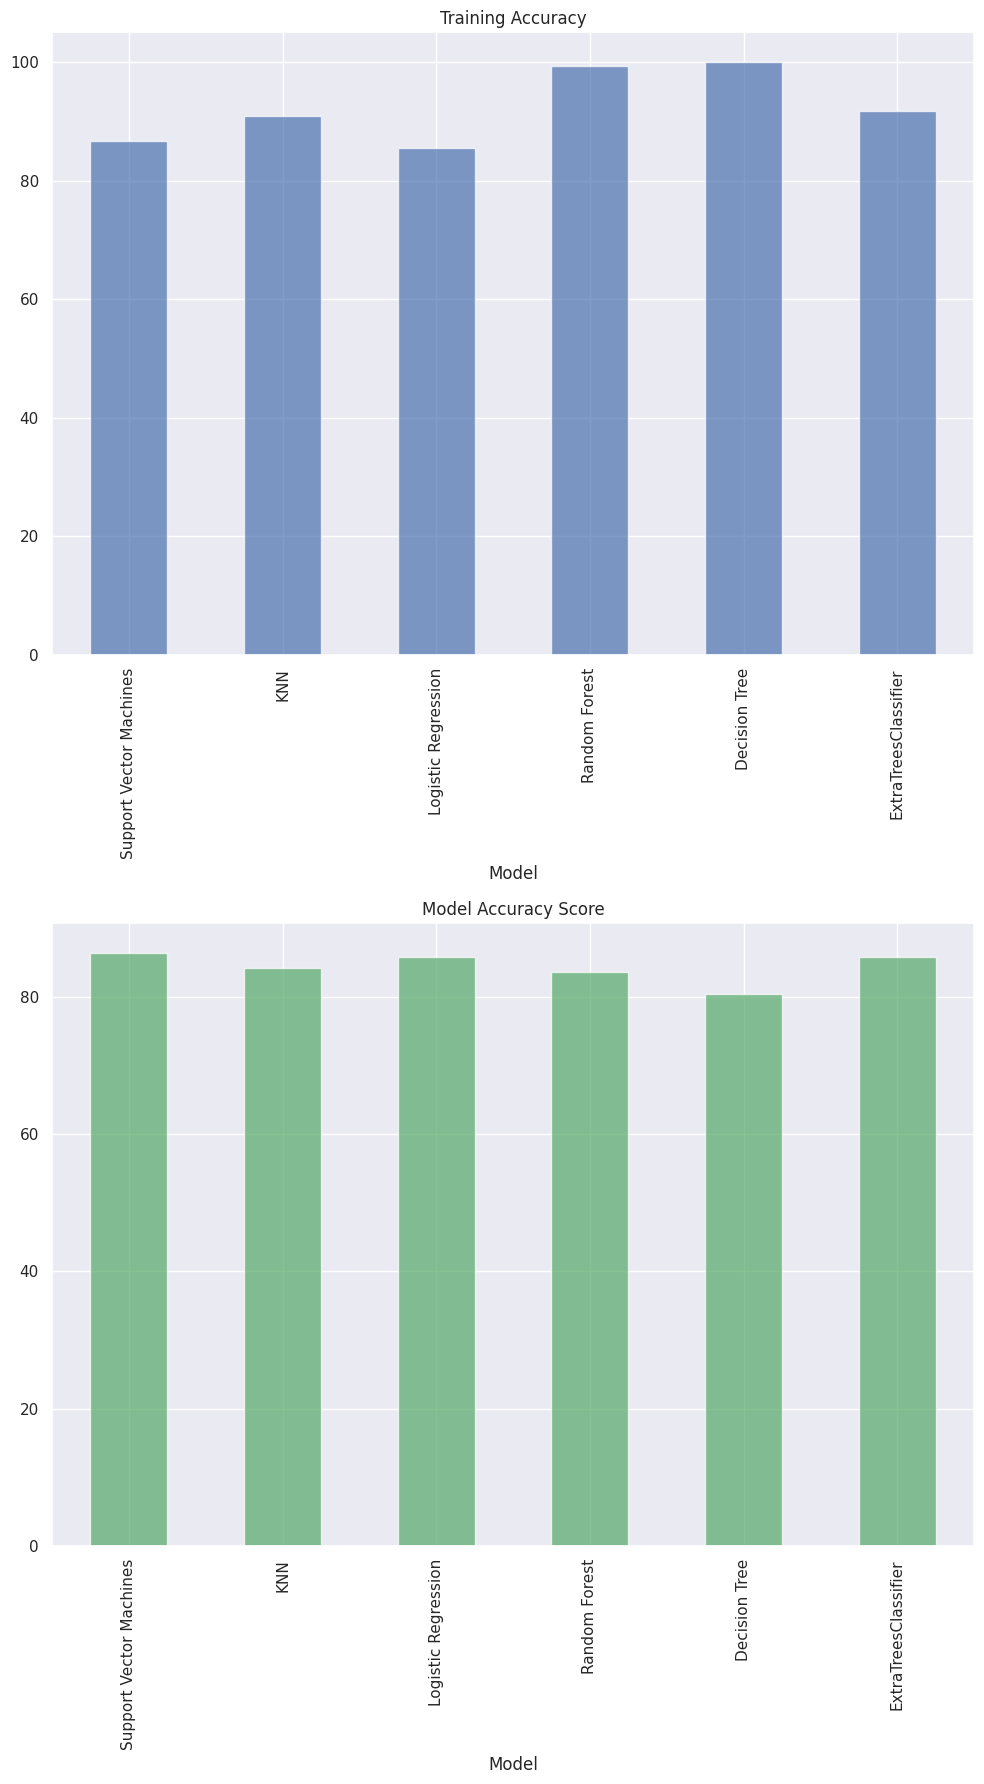

In [58]:
models.set_index('Model', inplace=True)
# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 18))

# Training Accuracy
models['Training Accuracy'].plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
axes[0].set_title('Training Accuracy')

# Bar plot for Model Accuracy Score
models['Model Accuracy Score'].plot(kind='bar', ax=axes[1], color='g', alpha=0.7)
axes[1].set_title('Model Accuracy Score')


plt.tight_layout()
plt.show()

The Random Forest model performed better than other models with an accuracy of 88% . The accuracy of the model can be improved by increasing the size of the dataset.

# Phase3: unsupervised learning


In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances , silhouette_samples

1- K-Means is an algorithm for clustering unlabelled data into k groups and each datapoint is assigned to the closest centroid. In this section     

we assume that our dataset does not have a label, so we build the algorithm with only 11 independent variables, no HeartDisease includes.   

The performance of the model depends on the value of k. To find the optimal value of k, elbow method is performed.

Text(0, 0.5, 'Loss')

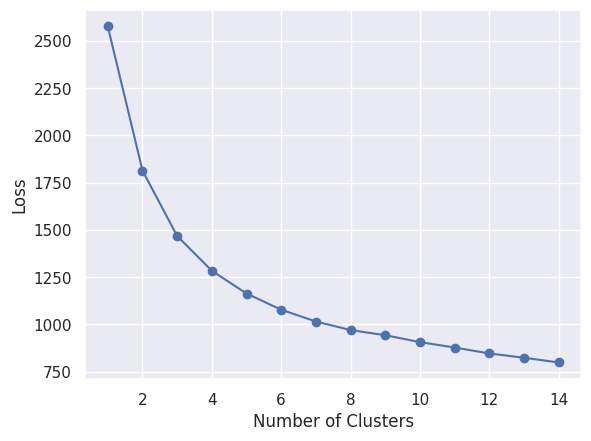

In [61]:
# elbow method
losses = []
for K in range(1, 15):
    kmeans = KMeans(n_clusters=K, random_state= 42)
    kmeans.fit(X_train)
    losses.append(kmeans.inertia_)

    
plt.plot(range(1,15), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

 as shown above after k = 3 the loss is decreasing with lower rate so we will trying k with different sizes [2,3,4]


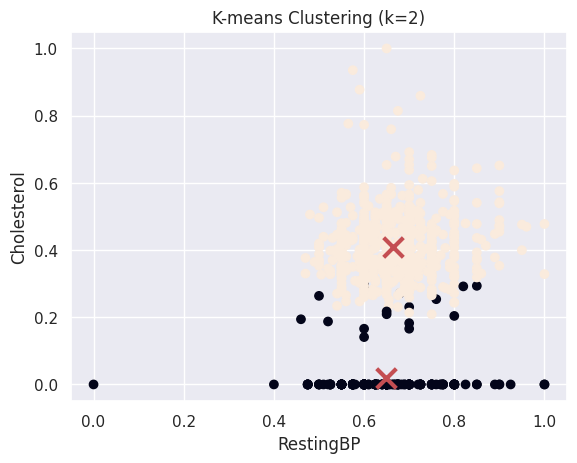

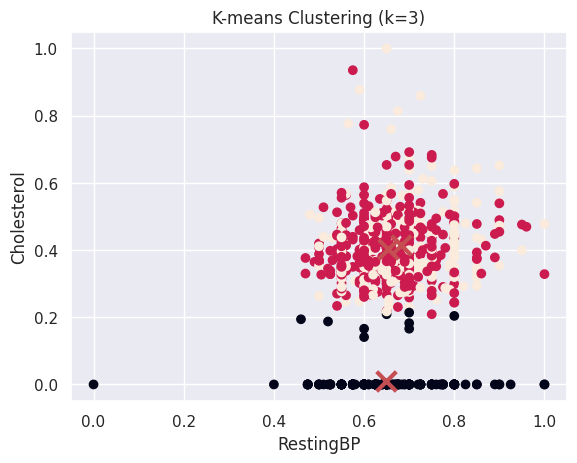

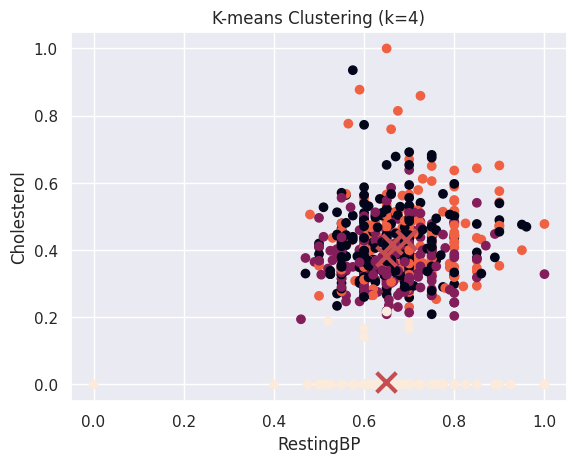

In [64]:
# Select features to use for clustering
X = df[['RestingBP', 'Cholesterol', 'MaxHR']]
y_true = df['HeartDisease']

# Try three different values of k
ks = [2, 3, 4]

# Loop over values of k and fit KMeans model
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    
    # Get cluster assignments and centroids
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    
    # Plot the results
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
    plt.title('K-means Clustering (k={})'.format(k))
    plt.xlabel('RestingBP')
    plt.ylabel('Cholesterol')
    plt.show()


# 1-Silhouette coefficient

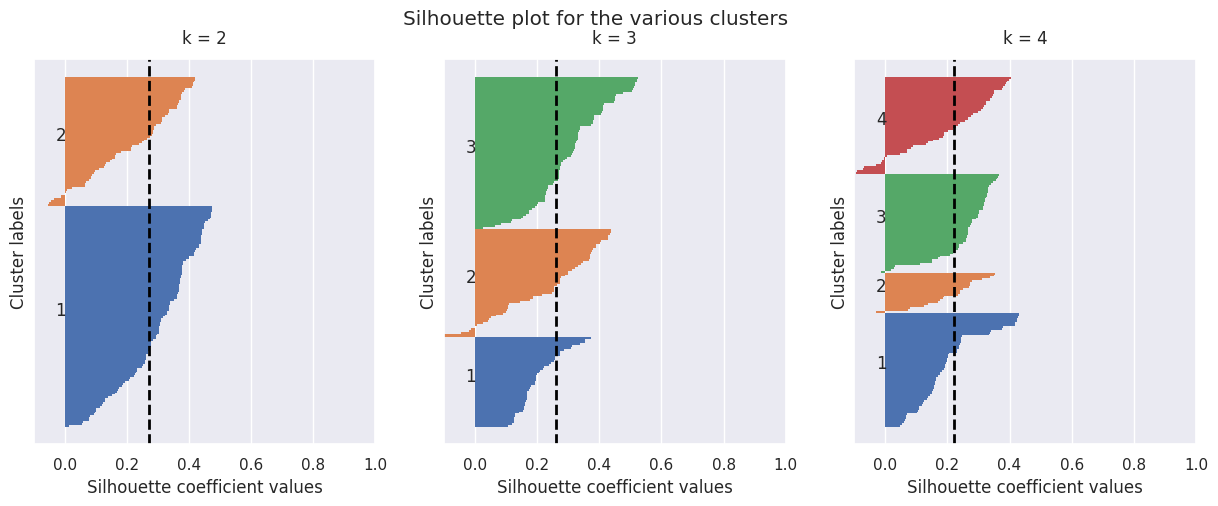

In [68]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Silhouette plot for the various clusters')
for  j , k in enumerate([2, 3, 4]):

    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    labels = km.predict(X_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_test, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    ax = plt.subplot(1,3,j+1)
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax.axvline(avg_score, linestyle='--', linewidth=2, color='black')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster labels')
    ax.set_title('k = {}'.format(k), y=1.02);
    


Text(0, 0.5, 'Silhouette score')

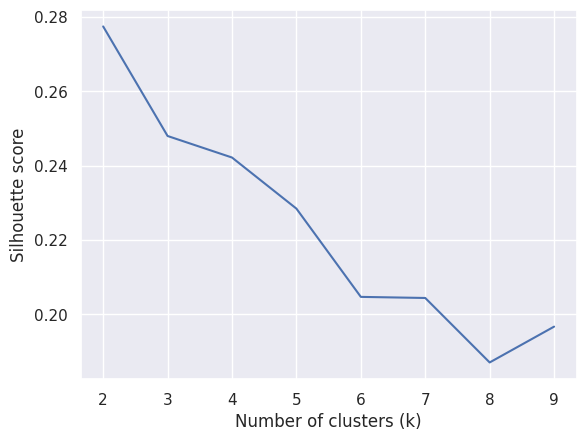

In [71]:
silhouette_scores = []
# Apply k-means clustering for each value of k and calculate the evaluation metrics
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,   random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))

plt.plot(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')

# 2- total within-cluster sum of squares  
The total within-cluster sum of squares (WCSS) is a metric that measures the variability of the data within each cluster. A lower value of WCSS indicates that the data points within each cluster are more similar to each other, which is desirable in clustering.

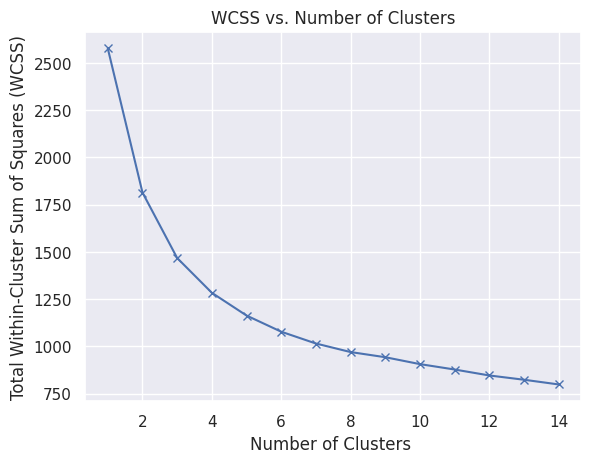

In [73]:
# Loop over values of k and fit KMeans model
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    
    # Get total within-cluster sum of squares
    wcss.append(kmeans.inertia_)

# Visualize the WCSS results
plt.plot(range(1,len(wcss)+1), wcss, 'bx-')
plt.xlabel('Number of Clusters ')
plt.ylabel('Total Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS vs. Number of Clusters')
plt.show()

# 3- B-cubed prescision and recall evaluation

B-cubed precision and recall are evaluation metrics for cluster quality that take into account both the clustering and ground truth labels of the data.

 B-cubed precision measures the proportion of data points in a cluster that belong to the same ground truth label, while B-cubed recall measures the proportion of data points with a given ground truth label that are assigned to the same cluster.

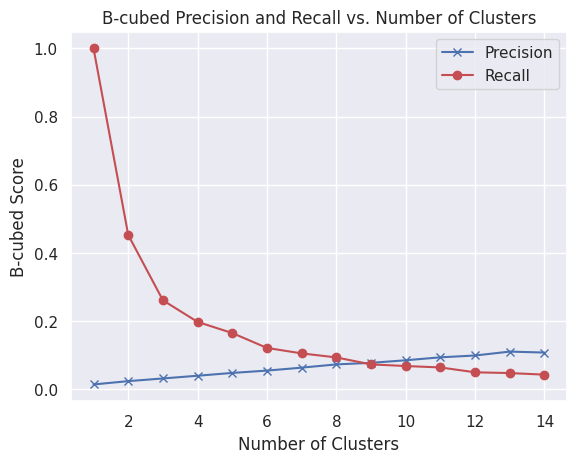

In [78]:
# Calculate ground truth labels (assumes 'Target' column contains the true labels)
true_labels = y_test

# Loop over values of k and fit KMeans model
precision_scores = []
recall_scores = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    
    # Get cluster assignments and calculate B-cubed precision and recall
    labels = kmeans.predict(X_test)
    dist = pairwise_distances(X_test, metric='euclidean')
    unique_labels = np.unique(labels)
    precision = 0
    recall = 0    
    for label in unique_labels:
        mask = labels == label
        sub_dist = dist[mask][:,mask]
        n = np.sum(mask)
        if n > 1:
            p = np.sum(sub_dist) / (n * (n - 1))
            r = np.sum(sub_dist, axis=1) / np.sum(dist[mask], axis=1)
            precision += np.sum(p)
            recall += np.sum(r)
    
    precision /= len(X_test)
    recall /= len(X_test)

    
    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)

# Visualize the precision and recall results
plt.plot(range(1,len(precision_scores)+1), precision_scores, 'bx-', label='Precision')
plt.plot(range(1,len(recall_scores)+1), recall_scores, 'ro-', label='Recall')
plt.xlabel('Number of Clusters')
plt.ylabel('B-cubed Score')
plt.title('B-cubed Precision and Recall vs. Number of Clusters')
plt.legend()
plt.show()

# **Let's Summerize The Result for k = [2,3,4]**


In [80]:
# Loop over values of k and fit KMeans model
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(X_train)
    
    # Get cluster assignments and calculate silhouette score
    labels = kmeans.labels_
    silhouette = silhouette_score(X_train, labels, metric='euclidean')
    
    # Calculate total within-cluster sum of squares
    wcss = kmeans.inertia_
    
    # Calculate B-cubed precision and recall
    dist = pairwise_distances(X_train, metric='euclidean')
    unique_labels = np.unique(labels)
    precision = 0
    recall = 0
    for label in unique_labels:
        mask = labels == label
        sub_dist = dist[mask][:, mask]
        n = np.sum(mask)
        if n > 1:
            p = np.sum(sub_dist) / (n * (n - 1))
            r = np.sum(sub_dist, axis=1) / np.sum(dist[mask], axis=1)
            precision += np.sum(p)
            recall += np.sum(r)
    
    precision /= len(X_test)
    recall /= len(X_test)
    
    # Print evaluation metrics
    print('Evaluation metrics for k={}'.format(k))
    print('Silhouette score: {:.2f}'.format(silhouette))
    print('Total within-cluster sum of squares: {:.2f}'.format(wcss))
    print('B-cubed precision: {:.2f}'.format(precision))
    print('B-cubed recall: {:.2f}'.format(recall))
    print('--------------------------------------------------------------')
    


Evaluation metrics for k=2
Silhouette score: 0.28
Total within-cluster sum of squares: 1814.26
B-cubed precision: 0.02
B-cubed recall: 1.69
--------------------------------------------------------------
Evaluation metrics for k=3
Silhouette score: 0.25
Total within-cluster sum of squares: 1467.75
B-cubed precision: 0.03
B-cubed recall: 1.02
--------------------------------------------------------------
Evaluation metrics for k=4
Silhouette score: 0.24
Total within-cluster sum of squares: 1283.77
B-cubed precision: 0.04
B-cubed recall: 0.77
--------------------------------------------------------------
